## First define beta phase based on Cp(30), Cp(80), and Cp($\infty$)

In [4]:
import math
def ln(x):
    return math.log(x)

In [5]:
Cpeak=2433
C30=828.67
C82=624.21
Cinf=450

In [6]:
def mean_Cp_beta(t, C30=828.67, C82=624.21, Cinf=507, printbeta=False):  
    # Cinf=507 is from Cp_estimation_20150305_20150805.xlsx. That seemed to produce the 
    # best fit (in terms of r's) for 10-30 min and 30-100 min data.
    beta = -(ln(C82-Cinf)-ln(C30-Cinf))/(82.0-29.7)
    if printbeta:
        print('beta = {0:1.4f}'.format(beta))
        print('t_half_beta = {0:3.1f}'.format(ln(2.0)/beta))
        return beta
    return Cinf + (C30-Cinf) * math.exp(-beta*(t-30))

beta = -(ln(624.21-507)-ln(828.67-507))/(82.0-29.7)
print('time\tCp-beta')
print('====\t=======')
for time in range(10,111,10):
    print('{0:>3}\t  {1:4.0f}'.format(time, mean_Cp_beta(time,C30=C30,C82=C82,Cinf=Cinf)))
print()
beta = mean_Cp_beta(0,C30=C30,C82=C82,Cinf=Cinf, printbeta=True)
print()
print('mean_Cp_beta( 0) = {0:.0f}'.format(mean_Cp_beta( 0,Cinf=Cinf)))
bigB = mean_Cp_beta(10,Cinf=Cinf) - Cinf
print('bigB = {0:.5f}'.format(bigB))
print('mean_Cp_beta(10) = {0:.0f} (check)'.format(Cinf+bigB))

time	Cp-beta
====	=======
 10	   960
 20	   889
 30	   829
 40	   776
 50	   731
 60	   693
 70	   659
 80	   630
 90	   605
100	   584
110	   565

beta = 0.0148
t_half_beta = 46.7

mean_Cp_beta( 0) = 1041
bigB = 509.57090
mean_Cp_beta(10) = 960 (check)


In [7]:
alpha = (ln(Cpeak)-ln(mean_Cp_beta(10,Cinf=Cinf)) - 0)/(30-10)
print('alpha = {0:1.4f}'.format(alpha))
print('t_half_alpha = {0:3.1f}'.format(ln(2.0)/alpha))
bigA = Cpeak-mean_Cp_beta(10,Cinf=Cinf)
print('bigA = {0:.0f}'.format(bigA))
print('refigured Cpeak = {0:.0f}'.format(Cinf+bigA+bigB))
print(' original Cpeak = {0:.0f}'.format(Cpeak))
print('bigA*e**(-alpha*(30-10)) = {0:.0f}'.format(bigA*math.exp(-alpha*(30-10))))
print(bigA*math.exp(-alpha*(30-10))+mean_Cp_beta(30,Cinf=Cinf))

alpha = 0.0465
t_half_alpha = 14.9
bigA = 1473
refigured Cpeak = 2433
 original Cpeak = 2433
bigA*e**(-alpha*(30-10)) = 581
1409.787832311517


In [8]:
def Cp(t):
    return Cinf + bigA*math.exp(-alpha*(t-10)) + bigB*math.exp(-beta*(t-10))
print('time\t   Cp')
print('====\t=======')
for time in range(10,111,10):
    print('{0:>3}\t  {1:4.0f}'.format(time, Cp(time)))
Cinf + bigA*math.exp(-alpha*(10-10)) + bigB*math.exp(-beta*(10-10))

time	   Cp
====	=======
 10	  2433
 20	  1815
 30	  1410
 40	  1141
 50	   961
 60	   837
 70	   750
 80	   687
 90	   641
100	   606
110	   580


2433.0

**Wait.** With the assumptions above, Cp(30) is supposed to be 829, and since Cp-beta(30) = 829, that means $A \cdot e^{\alpha (30-10)} = 0 $, but of course that doesn't happen with positive values of $A$. There has to be some compromise. Let's call the l.h.s. of that last equation $diff$, or:

$diff = A \cdot e^{-\alpha (30-10)}$. 

So if $t_{\frac{1}{2} \alpha} = 8.4$ min. (*see Siddiqi et al 2016 LD pharm review*), $\alpha = \ln{2} \div t_{\frac{1}{2} \alpha} \approx 0.08251752 $, so $diff = bigA \cdot e^{-\alpha (30-10)} \approx 282.87$.

In [9]:
def to_alpha(thalfalpha=8.4):
    return ln(2)/thalfalpha
to_alpha()

0.08251752149523157

In [10]:
bigA * math.exp(-to_alpha(8.4)*(30-10))

282.8727801449785

In [11]:
print(bigA)
print(math.exp(-to_alpha()*(30-10)))

1473.429103034437
0.19198262038018613


That's too big of a $diff$ considering that $diff$ looks like about zero on the plot. 

Alternatively, we can solve for $\alpha$ in terms of $diff$:

$\alpha = \frac{\ln{A} - \ln{diff}}{30-10}$

In [12]:
print(ln(2)) ; print()
print('diff\t alpha\tthalfalpha')
print('====\t======\t==========')
for difftest in [3,9,27,45,90,145,283]:
    alphatest=(ln(bigA)-ln(difftest))/(30-10)
    print('{0:>3}\t{1:.4f}\t   {2:3.1f}'.format(difftest, alphatest, ln(2)/alphatest))

0.6931471805599453

diff	 alpha	thalfalpha
====	======	==========
  3	0.3098	   2.2
  9	0.2549	   2.7
 27	0.2000	   3.5
 45	0.1744	   4.0
 90	0.1398	   5.0
145	0.1159	   6.0
283	0.0825	   8.4


### At this point I just played around with parameters to get good starting parameters.

**See Cp_estimation_20150305_20150805.xlsx. I get a reasonable-looking graph from:**

A = 1473.4, alpha = 0.17443, B = 509.57, beta = 0.0148, Cinf = 450, diff = 45.

    time	new estimate
    10  	2433
    10.9	2212
    15  	1539
    20.1	1142
    24.5	979
    29.7	878
    39.9	785
    57.1	704
    82  	626
    100.8	583

The infusion was designed to lead to Cinf = 600, but the model above with Cinf = 450 appears to fit the data better. C'est la vie.
### So. Here's the plan. Let's keep Cinf=450 for now. Then . . .

1. We draw $C_p(0)$, $C_p(9)$, $C_p(29.7)$ and $C_p(82)$ values at random, from normal distributions with mean and SD for each time point based on the data from the Black et al 2003 paper.  

2. We calculate $Cpeak = C_{p,loading}(t_{load})$ from $Cp(0)$ and $Cp(9)$ by simply affine scaling the parabola I drew from the real data, _i.e._ that 2003 paper, to fit $Cp(9)$. In other words, if we call that real-data parabola $g(t)$, then $C_{p,loading}=f(t)*Cp(9)/g(9)$

3. Then we solve for A, alpha, B and beta as follows. 
    1. First we fit $C_{p\beta}=C_{\infty}+Be^{-\beta(t-10)}$ to $(29.7,C_p(29.7))$ and $(82,C_p(82))$ using the values drawn at random in step 1. 
    
    3. Then we fit $C_{p\alpha}=C_{p\beta} + Ae^{-\alpha(t-t_{load})}$ to $(t_{load},C_{peak})$ and $(29.7,C_p(29.7))$, or, in other words, we fit $Ae^{-\alpha(t-t_{load})}$ to $(t_{load},C_{peak})-C_{p\beta}(t_{load}))$ and $(29.7,diff))$. (Remember that  $diff=C_p(29.7)-C_{p\beta}(29.7)$.)
    

So we get $$C_{p,maint}(t)=C_{\infty} + Ae^{-\alpha(t-10)} + Be^{-\beta(t-10)}$$.

The following times come from average times and data from LD infusions in Black et al 2003. 
See `hysteresis_plotting_3.ipynb` for details.

       time	   conc
      =====	 ======
        0.0	    0.0
        4.5	 1226.7
        9.0	 2237.9
       10.9	 1822.6
       15.0	 1538.4
       20.1	 1150.9
       24.5	 1171.4
       29.7	  828.7
       39.9	  779.6
       57.1	  702.1
       82.0	  624.2
      100.8	  589.8

The old version of Cp_early was:

`Cp_early = 55.4 + 286.69*t - 5.8671*t*t` , so that 
    
    Cp_early(9)  = 2160.3749
    Cp_early(10) = 2335.59

And `tload = 10`. 

In [13]:
def Cp_early(t,a0=55.4,a1=286.69,a2=-5.8671):
    "Just a parabola in t. See hysteresis_5 for details. WARNING: +a2 not -a2."
    return a0+t*(a1+a2*t)

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math
plottimes=np.asarray([0.0,4.5,9.0,10.0,10.9,15.0,20.1,\
                      24.5,29.7,39.9,57.1,82.0,100.8])
plotconcs=np.asarray([55.4,1226.7,2237.9,(2433.3+2237.9)/2,1822.6,1538.4,1150.9,\
                      1171.4,828.7,779.6,702.1,624.2,589.8])
earlytimes=np.asarray([0.0,4.5,9.0])
earlyconcs=np.asarray([55.4,1226.7,2237.9])

## earlytimes, earlyconcs defined above

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(Cp_early,earlytimes,earlyconcs,p0=[55.4,286.69,-5.8671])
print(popt)

[  55.4         278.07777778   -3.95308642]


C:\Users\kevin\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [16]:
print('time\t old\t new')
print('====\t======\t======')
for time in [0,4.5,9,10]:
    print('{0:>3}\t{1:6.1f}\t{2:6.1f}'.\
          format(time, Cp_early(time),Cp_early(time,popt[0],popt[1],popt[2])))

time	 old	 new
====	======	======
  0	  55.4	  55.4
4.5	1226.7	1226.7
  9	2160.4	2237.9
 10	2335.6	2440.9


**Wait.** This is just a quadratic and 3 nicely-behaved points. We can solve exactly.

_Some algebra here . . ._

**Given:**

$y = a+bt+ct^2$, the $y$-intercept $(0,y_0)$ and two other points $(t_1,y_1), (t_2,y_2)$, with $t_2 > t_1 > 0$.

**First** use $(0,y_0)$: $a=y_0$. 

**Next** use $(t_1,y_1)$ and $t_1>0$ and solve for $b$ in terms of knowns and $c$:

$$bt_1=y_1-a-ct_1^2$$

$$b=\frac{y_1-a}{t_1}-ct_1 \qquad *$$

**Next** use $(t_2,y_2)$ and $t_2 > t_1 > 0$ and solve for $c$ in terms of knowns:

$$y_2=a+bt_2+ct_2^2 $$

$$ct_2^2=y_2-a-bt_2 $$

$$c=\frac{y_2-a}{t_2^2}-\frac{b}{t_2}$$

$$=\frac{y_2-a}{t_2^2} - \left[ \frac{y_1-a}{t_1}-ct_1 \right] \cdot \frac{1}{t_2}$$

$$=\frac{y_2-a}{t_2^2} - \frac{y_1-a}{t_1t_2} + \frac{ct_1}{t_2}$$

Gathering terms with $c$,

$$c \left(1-\frac{t_1}{t_2} \right) = \left(\frac{y_2-a}{t_2^2}-\frac{y_1-a}{t_1t_2} \right)$$

Note that the bracketed quantity on the left hand side $= (t_2-t_1)/t_2$, so dividing by it leads to:

$$c = \left(\frac{y_2-a}{t_2^2}-\frac{y_1-a}{t_1t_2} \right) \cdot \frac{t_2}{t_2-t_1}$$

$$ = \left(\frac{y_2-a}{t_2}-\frac{y_1-a}{t_1} \right) \cdot \frac{1}{t_2-t_1}$$

**Finally**, substitute this expression for $c$ to solve for $b$ in terms of knowns only:

$$b=\frac{y_1-a}{t_1}-ct_1$$

$$ =\frac{y_1-a}{t_1} - \left[ \left(\frac{y_2-a}{t_2}-\frac{y_1-a}{t_1} \right) \frac{1}{t_2-t_1} \right] \cdot t_1 $$

$$ =\frac{y_1-a}{t_1}  - \frac{t_1(y_2-a)}{t_2(t_2-t_1)} + \frac{y_1-a}{t_2-t_1}$$

$$ =\frac{y_1-a}{t_1} \cdot \frac{t_2(t_2-t_1)}{t_2(t_2-t_1)} - \frac{t_1(y_2-a)}{t_2(t_2-t_1)}\cdot\frac{t_1}{t_1} + \frac{y_1-a}{t_2-t_1}\cdot\frac{t_1t_2}{t_1t_2}$$

$$=\frac{(y_1-a)(t_2-t_1)t_2 - t_1^2(y_2-a) + t_1t_2(y_1-a)}{t_1t_2(t_2-t_1)}$$

Gathering $(y_1-a)$ terms,

$$=\frac{(y_1-a)\left[t_2^2-t_1t_2+t_1t_2\right]-t_1^2(y_2-a)}{t_1t_2(t_2-t_1)}$$

$$b=\frac{t_2^2(y_1-a)-t_1^2(y_2-a)}{t_1t_2(t_2-t_1)}$$

So now we know $a$, $b$, and $c$, each in terms of the original information provided only.

**Oh.** Actually all that stuff after "Finally" is not really necessary, since the computer can get c first, from the line just above "Finally," then compute b numerically from the line marked by the asterisk. Whatever. Such fun.

In [17]:
def quadratic_coeffs(y0, t1,y1, t2,y2):
    """ Returns (a0, a1, a2), for y = a0 + a1*t + a2*t*t, from the y-intercept (0,y0) and 
    2 other points (t1,y1) and (t2,y2) on the parabola. 
    """
    assert t1 * t2 * (t2-t1) != 0 , 'This solution assumes that t1, t2 and t2-t1 are nonzero.'
    a = y0
    c = ((y2-a)/t2 - (y1-a)/t1)/(t2-t1)
    b = (y1-a)/t1 - c*t1
    return (a,b,c)

Let's test that algebra briefly:

In [18]:
a = 1 ; b = 200 ; c = -5
for x in (0, 5, 9):
    print('{0}\t{1:7.2f}'.format(x,a + b*x + c*x*x))

0	   1.00
5	 876.00
9	1396.00


In [19]:
quadratic_coeffs(1,5,876,9,1396)

(1, 200.0, -5.0)

OK, now for the excitement:

In [20]:
(a,b,c) = quadratic_coeffs(56.21, 4.5,1226.7, 9,2237.9)
print('a\tb\tc')
print('{0:.2f}\t{1:.2f}\t{2:.4f}\t\n'.format(a,b,c))
for t in (0, 4.5, 9, 10):
    print('{0}\t{1:7.2f}'.format(t,a + b*t + c*t*t))

a	b	c
56.21	277.81	-3.9331	

0	  56.21
4.5	1226.70
9	2237.90
10	2440.98


**Yay!**

OK, now to generalize.

So the single best parabola is this one, $y=56.21+277.81t-3.9331t^2$.

To scale it to look similar but scaled to varying values of $C_p(0)$ and $C_p(9)$, I'll rewrite that as 

$y = C_p(0) + \frac{C_p(9)-C_p(0)}{2237.9-56.21} \cdot (277.81t - 3.9331t^2)$ .

In [21]:
# We use this number in the next box.
(277.81*10 - 3.9331*100)/(2237.9-56.21)

1.093092969211941

In [22]:
import numpy as np

samples = 100
min_ratio = 1.2  # see the "must be" lines below

# see hysteresis_plotting_3.ipynb (07 Aug 2016) for most values (below), and
#   Cp_estimation_20150304_20160806.xlsx for the zero and 9-minute values.

times  = np.asarray([0.,       4.5,    9.0,  29.7,  82.0])
concs  = np.asarray([56.21, 1226.7, 2237.9, 828.7, 624.2])
stdevs = np.asarray([45.74,  824.7,  794.3, 138.1, 244.5])

c0s  = np.random.normal(concs[0], stdevs[0], samples)
c9s  = np.random.normal(concs[2], stdevs[2], samples)
c30s = np.random.normal(concs[3], stdevs[3], samples)
c80s = np.random.normal(concs[4], stdevs[4], samples)

print('c0s:\t',c0s[:5])
print('c9s:\t',c9s[:5])
print('c30s:\t',c30s[:5])
print('c80s:\t',c80s[:5])

# Make sure the numbers make sense:
# All concentrations must be nonnegative:
c0s[c0s<0] = 0
c9s[c9s<0] = 0
c30s[c30s<0] = 0
c80s[c80s<0] = 0

print('After clipping zeroes:')
print('c0s:\t',c0s[:5])
print('c9s:\t',c9s[:5])
print('c30s:\t',c30s[:5])
print('c80s:\t',c80s[:5])

# c9 must be > c0. In fact, to make any sense, it has to be a good bit bigger. 
c9s.clip(min=np.minimum(100.0,c0s*min_ratio),out=c9s)
# and c10 > c30 > c80 must be true. First we need to compute c10 (i.e. use 
#  t = 10.0 and t**2 = 100.0). Note that (277.81*10 - 3.9331*100)/(2237.9-56.21) = 1.0931.
c10s = c0s + 1.0931*(c9s-c0s)
c30s.clip(max=(c10s/min_ratio),out=c30s)
c80s.clip(max=(c30s/min_ratio),out=c80s)

print('After clipping for ratio:')
print('c0s:\t',c0s[:5])
print('c9s:\t',c9s[:5])
print('c10s:\t',c10s[:5])
print('c30s:\t',c30s[:5])
print('c80s:\t',c80s[:5])

c0s:	 [ 33.82331356  53.95107045  23.22530819  -0.88311424  35.90458682]
c9s:	 [ 1969.56544581  3401.20656386  1720.98263339  2712.26784153  -586.12943553]
c30s:	 [ 771.01592321  593.08511061  629.02155711  513.95184193  816.26644071]
c80s:	 [ 577.80893281  385.35701293  815.50454545  809.55425294  537.65772072]
After clipping zeroes:
c0s:	 [ 33.82331356  53.95107045  23.22530819   0.          35.90458682]
c9s:	 [ 1969.56544581  3401.20656386  1720.98263339  2712.26784153     0.        ]
c30s:	 [ 771.01592321  593.08511061  629.02155711  513.95184193  816.26644071]
c80s:	 [ 577.80893281  385.35701293  815.50454545  809.55425294  537.65772072]
After clipping for ratio:
c0s:	 [ 33.82331356  53.95107045  23.22530819   0.          35.90458682]
c9s:	 [ 1969.56544581  3401.20656386  1720.98263339  2712.26784153    43.08550419]
c10s:	 [ 2149.78303832  3712.8360503   1879.04384037  2964.77997757    43.75404759]
c30s:	 [ 771.01592321  593.08511061  629.02155711  513.95184193   36.46170633]
c80s

How often should I expect to see negative numbers? Well, how many S.D.s are the means of the concs away from zero?

In [23]:
print('times:',times)
print('tstat:',concs/stdevs)

times: [  0.    4.5   9.   29.7  82. ]
tstat: [ 1.22890249  1.48744998  2.81744933  6.00072411  2.55296524]


In [24]:
for i in (c0s,c10s,c30s,c80s):
    print(i[:4])
print()
stacked = np.stack((c0s,c10s,c30s,c80s),axis=1)
print(stacked[:6,:])
test=stacked[2,:]
print()
print(test)
print()
print(stacked.mean(axis=0))
print()
print(times)
print(concs)

[ 33.82331356  53.95107045  23.22530819   0.        ]
[ 2149.78303832  3712.8360503   1879.04384037  2964.77997757]
[ 771.01592321  593.08511061  629.02155711  513.95184193]
[ 577.80893281  385.35701293  524.18463092  428.29320161]

[[   33.82331356  2149.78303832   771.01592321   577.80893281]
 [   53.95107045  3712.8360503    593.08511061   385.35701293]
 [   23.22530819  1879.04384037   629.02155711   524.18463092]
 [    0.          2964.77997757   513.95184193   428.29320161]
 [   35.90458682    43.75404759    36.46170633    30.38475527]
 [   34.66998706  1452.4020048    816.96329461   680.80274551]]

[   23.22530819  1879.04384037   629.02155711   524.18463092]

[   54.48503863  2450.52995339   804.65847712   537.43967815]

[  0.    4.5   9.   29.7  82. ]
[   56.21  1226.7   2237.9    828.7    624.2 ]


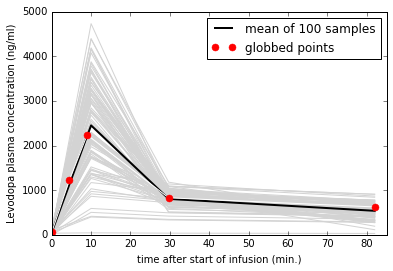

In [25]:
%matplotlib inline

t = np.asarray([0,10,29.7,82])

plt.axis((0,85,0,5000))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
for i in range(100):
    plt.plot(t,stacked[i,:],color='lightgrey',marker=None,linewidth=1.0, label='_nolegend_')
plt.plot(t,np.mean(stacked,axis=0),'k',linewidth=2,label='mean of 100 samples')
plt.plot(times,concs,'white',markerfacecolor='red',markeredgecolor='red',\
         marker='o',markersize=7,label='globbed points')
plt.legend(loc='upper right')
plt.show() 

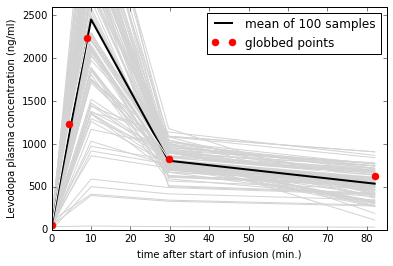

In [26]:
plt.axis((0,85,0,2600))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
for i in range(100):
    plt.plot(t,stacked[i,:],color='lightgrey',marker=None,linewidth=1.0, label='_nolegend_')
plt.plot(t,np.mean(stacked,axis=0),'k',linewidth=2,label='mean of 100 samples')
plt.plot(times,concs,'white',markerfacecolor='red',markeredgecolor='red',\
         marker='o',markersize=7,label='globbed points')
plt.legend(loc='upper right')
plt.show() 

In [27]:
print('Mean of 100 samples:')
print('time:',t)
print('[LD]:',np.around(np.mean(stacked,axis=0)))
print('Globbed points:')
print('time:',times)
print('[LD]:',np.around(concs))

Mean of 100 samples:
time: [  0.   10.   29.7  82. ]
[LD]: [   54.  2451.   805.   537.]
Globbed points:
time: [  0.    4.5   9.   29.7  82. ]
[LD]: [   56.  1227.  2238.   829.   624.]


In [28]:
headerstring = str(t.tolist()).translate({ord(c): None for c in '[]'})
# Thanks, http://stackoverflow.com/questions/3939361/remove-specific-characters-from-a-string-in-python
headerstring

'0.0, 10.0, 29.7, 82.0'

In [29]:
# np.savetxt('cp100.csv', stacked, delimiter=',', header=headerstring, comments='')
np.savetxt('cp100.csv', stacked, delimiter=',', header='Time in minutes: '+headerstring)

So. *diff* can be anywhere from 3 to 300, best guess 45, and $C_{\infty}$ is probably between about 400 and 600, best guess 450.

In [30]:
tload = 10 # minutes
t1=29.7    # minutes
t2=82      # minutes
# Cinf is probably in [400, 600], best guess 450.

def find_beta(Ct1,Ct2,Cinf=450):
    return -(ln(Ct2-Cinf)-ln(Ct1-Cinf))/(t2-t1)

In [86]:
# diff is in [3, 300], best guess 45

def Cp_early(t, Cp0, Cp9):
    return Cp0 + ((Cp9-Cp0)/(2237.9-56.21))*(277.81*t - 3.9331*t*t)
#Cpeak = Cp_early(tload,56.21,2237.9)

# I'm defining this separately so curve_fit doesn't try to optimize Cp0 and Cp9
def Cp_late(t, A, alpha, B, beta, Cinf):
    # Cinf+(A+B) should equal Cpeak.
    return Cinf + A*np.exp(-alpha*(t-tload))+B*np.exp(-beta*(t-tload))

def Cp(t, Cp0, Cp9, A, alpha, B, beta, Cinf):
#    def Cp_early(t):
#        return Cp0 + ((Cp9-Cp0)/(2237.9-56.21))*(277.81*t - 3.9331*t*t)
#    Cpeak = Cp_early(tload)
    return np.where(t<=tload,Cp_early(t,Cp0,Cp9),Cp_late(t,A,alpha,B,beta,Cinf))

In [83]:
times  = np.asarray([0.,       4.5,    9.0,  29.7,  82.0])
concs  = np.asarray([56.21, 1226.7, 2237.9, 828.7, 624.2])
startbeta = find_beta(concs[3],concs[4],450)
startbeta

0.014847806319107978

In [84]:
Cp(times,56.21,2237.9,2000,0.12,100,0.003,550)

array([   56.21      ,  1226.709725  ,  2237.9189    ,   832.34784364,
         630.92730399])

In [87]:
Cpeak=Cp_early(tload,concs[0],concs[2])
print('Cpeak = Cp(tload) = {0:.2f}'.format(Cpeak))

Cpeak = Cp(tload) = 2441.00


In [113]:
# FOR TESTING
Cinf = 450
diff = 45
#
times  = np.asarray([0.,       4.5,    9.0,  29.7,  82.0])
concs  = np.asarray([56.21, 1226.7, 2237.9, 828.7, 624.2])

times_late  = np.asarray([10.,   29.7,  82.0])
concs_late  = np.asarray([2441., 828.7, 624.2])

startbeta = find_beta(concs[-2],concs[-1],450)
p0test = [2000,0.12,100,0.003,550]
boundstest = ([100,0.03,100,0.001,100],[np.inf,np.inf,np.inf,0.03,1000])

from scipy.optimize import curve_fit
popt, pcov = curve_fit(Cp_late,times_late,concs_late,p0test,bounds=boundstest)
print(popt)
print(pcov)

[  1.81117781e+03   1.11674716e-01   1.00111002e+02   1.00000000e-03
   5.29862309e+02]
[[ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf]]


C:\Users\kevin\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [114]:
Cp(times,concs[0],concs[2],*popt)

array([   56.21      ,  1226.709725  ,  2237.9189    ,   828.70626983,
         623.60211078])

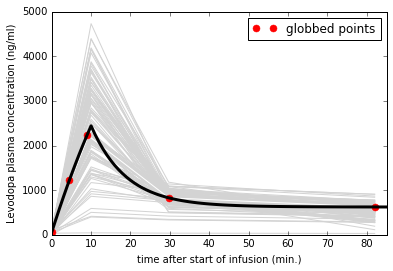

In [125]:
time = np.arange(0,121)

plt.axis((0,85,0,5000))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')

for i in range(100):
    plt.plot(t,stacked[i,:],color='lightgrey',marker=None,linewidth=1.0, label='_nolegend_')
# plt.plot(t,np.mean(stacked,axis=0),'k',linewidth=2,label='mean of 100 samples')
plt.plot(times,concs,'white',markerfacecolor='red',markeredgecolor='red',\
         marker='o',markersize=7,label='globbed points')
plt.legend(loc='upper right')

plt.plot(time,Cp(time,concs[0],concs[2],*popt),color='black',linewidth=3.0,label='fit-ish')

plt.show() 

## Almost there.

Next steps adapted from `hysteresis_plotting_3`.

### Original data:
<img src=method3_plot.png>

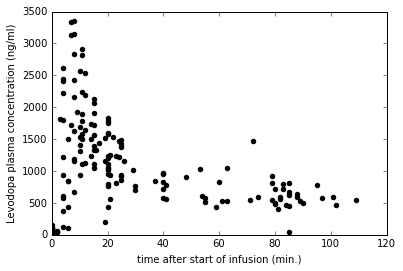

In [169]:
import csv
with open('Cp_estimation_20150304.csv', 'rb') as datafile:
    data  = np.genfromtxt(datafile, delimiter=",", usecols=range(0,7), names=True)  # imports as floats
    # it imports 7 blank rows at the end ...
    data = data[:-7]
data_times=data['new_minutes']
data_concs=data['LD']
plt.scatter(data_times,data_concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)')  # ,fontsize=16
plt.ylabel('Levodopa plasma concentration (ng/ml)')

In [170]:
zeroes   = np.mean(data_concs[data_times<2.5])

In [171]:
data_times[data_times<2.5]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  2.,  2.])

In [173]:
data_concs[data_times<2.5]

array([ 109.,   64.,   85.,   20.,   17.,   38.,   71.,   13.,   23.,
          7.,  147.,  103.,    0.,   90.,   38.,   47.,   59.])

In [194]:
fives    = np.mean(data_concs[np.logical_and(data_times>2.5,data_times <6.5)])
eights   = np.mean(data_concs[np.logical_and(data_times>6.5,data_times <=10.0)])
elevens  = np.mean(data_concs[np.logical_and(data_times>10.0,data_times <=12.5)])
fifteens = np.mean(data_concs[np.logical_and(data_times>12.5,data_times <=17.5)])
twenties = np.mean(data_concs[np.logical_and(data_times>17.5,data_times <=22.5)])
twen5s   = np.mean(data_concs[np.logical_and(data_times>22.5,data_times <=27.5)])
thirties = np.mean(data_concs[np.logical_and(data_times>27.5,data_times <=35)])
forties  = np.mean(data_concs[np.logical_and(data_times>35,data_times <=45)])
sixties  = np.mean(data_concs[np.logical_and(data_times>45,data_times <=70)])
eighties = np.mean(data_concs[np.logical_and(data_times>70,data_times <=90)])
lates    = np.mean(data_concs[data_times>90])

In [199]:
zero_time   = 0.0
five_time   = np.mean(data_times[np.logical_and(data_times>2.5,data_times <=6.5)])
eight_time  = np.mean(data_times[np.logical_and(data_times>6.5,data_times <=10.0)])
eleven_time = np.mean(data_times[np.logical_and(data_times>10.0,data_times <=12.5)])
fifteen_time= np.mean(data_times[np.logical_and(data_times>12.5,data_times <17.5)])
twenty_time = np.mean(data_times[np.logical_and(data_times>17.5,data_times <=22.5)])
twen5_time  = np.mean(data_times[np.logical_and(data_times>22.5,data_times <=27.5)])
thirty_time = np.mean(data_times[np.logical_and(data_times>27.5,data_times <=35)])
forty_time  = np.mean(data_times[np.logical_and(data_times>35,data_times <=45)])
sixty_time  = np.mean(data_times[np.logical_and(data_times>45,data_times <=70)])
eighty_time = np.mean(data_times[np.logical_and(data_times>70,data_times <=90)])
late_time   = np.mean(data_times[data_times>90])

zero_SD   = np.std(data_concs[data_times<2.5])
five_SD   = np.std(data_concs[np.logical_and(data_times>2.5,data_times <=6.5)])
eight_SD  = np.std(data_concs[np.logical_and(data_times>6.5,data_times <=10.0)])
eleven_SD = np.std(data_concs[np.logical_and(data_times>10.0,data_times <=12.5)])
fifteen_SD= np.std(data_concs[np.logical_and(data_times>12.5,data_times <17.5)])
twenty_SD = np.std(data_concs[np.logical_and(data_times>17.5,data_times <=22.5)])
twen5_SD  = np.std(data_concs[np.logical_and(data_times>22.5,data_times <=27.5)])
thirty_SD = np.std(data_concs[np.logical_and(data_times>27.5,data_times <=35)])
forty_SD  = np.std(data_concs[np.logical_and(data_times>35,data_times <=45)])
sixty_SD  = np.std(data_concs[np.logical_and(data_times>45,data_times <=70)])
eighty_SD = np.std(data_concs[np.logical_and(data_times>70,data_times <=90)])
late_SD   = np.std(data_concs[data_times>90])

zero_size   = data_times[data_times<2.5].size
five_size   = data_times[np.logical_and(data_times>2.5,data_times <=6.5)].size
eight_size  = data_times[np.logical_and(data_times>6.5,data_times <=10.0)].size
eleven_size = data_times[np.logical_and(data_times>10.0,data_times <=12.5)].size
fifteen_size= data_times[np.logical_and(data_times>12.5,data_times <17.5)].size
twenty_size = data_times[np.logical_and(data_times>17.5,data_times <=22.5)].size
twen5_size  = data_times[np.logical_and(data_times>22.5,data_times <=27.5)].size
thirty_size = data_times[np.logical_and(data_times>27.5,data_times <=35)].size
forty_size  = data_times[np.logical_and(data_times>35,data_times <=45)].size
sixty_size  = data_times[np.logical_and(data_times>45,data_times <=70)].size
eighty_size = data_times[np.logical_and(data_times>70,data_times <=90)].size
late_size   = data_times[data_times>90].size

time:      0.0,    4.5,    8.5,   11.3,   15.0,   20.1,   24.5,   29.7,   39.9,   57.1,   82.0,  100.8
[LD]:     54.8, 1226.7, 2005.4, 1945.3, 1538.4, 1150.9, 1171.4,  828.7,  779.6,  702.1,  624.2,  589.8
S.D.:     40.3,  824.7,  828.0,  576.5,  324.5,  429.3,  242.9,  138.1,  146.2,  219.9,  244.5,  101.7
N   :       17,     17,     19,     12,     14,     22,     11,      3,      8,     10,     24,      5


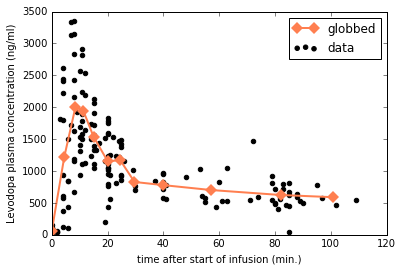

In [253]:
# First plot the real observed data.
plt.scatter(data_times,data_concs,color='black')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plot the globbed points
plottimes=(zero_time,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,
           thirty_time,forty_time,sixty_time,eighty_time,late_time)
plotconcs=(zeroes,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties,sixties,
           eighties,lates)
plt.plot(plottimes,plotconcs,'coral',markersize=8,marker=('D'),markeredgewidth=0,linewidth=2.0) 
    # marker=(8,2,0),marker='D',marker='o',markeredgecolor='lime',
    # http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

plt.legend(['globbed','data'], loc='upper right')  # no idea why this order
printstringend = 11*'{:7.1f},'+'{:7.1f}'
print('time:  '+printstringend.\
      format(zero_time,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,
        thirty_time,forty_time,sixty_time,eighty_time,late_time))
print('[LD]:  '+printstringend.\
      format(zeroes,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties,sixties,
             eighties,lates))
print('S.D.:  '+printstringend.\
      format(zero_SD,five_SD,eight_SD,eleven_SD,fifteen_SD,twenty_SD,twen5_SD,
        thirty_SD,forty_SD,sixty_SD,eighty_SD,late_SD))
printstringend = 11*'{:7d},'+'{:7d}'
print('N   :  '+printstringend.\
      format(zero_size,five_size,eight_size,eleven_size,fifteen_size,twenty_size,twen5_size,
        thirty_size,forty_size,sixty_size,eighty_size,late_size))
plt.show()

In [269]:
plottimes[3:],plotconcs[3:]

((11.333333333333334,
  15.0,
  20.09090909090909,
  24.545454545454547,
  29.666666666666668,
  39.875,
  57.100000000000001,
  82.041666666666671,
  100.8),
 (1945.3333333333333,
  1538.4285714285713,
  1150.8636363636363,
  1171.3636363636363,
  828.66666666666663,
  779.625,
  702.10000000000002,
  624.20833333333337,
  589.79999999999995))

In [272]:
newtimes = np.insert(plottimes[3:],0,tload)
newconcs = np.insert(plotconcs[3:],0,Cp_early(tload,plotconcs[0],plotconcs[2]))
newtimes, newconcs

(array([  10.        ,   11.33333333,   15.        ,   20.09090909,
          24.54545455,   29.66666667,   39.875     ,   57.1       ,
          82.04166667,  100.8       ]),
 array([ 2187.01344386,  1945.33333333,  1538.42857143,  1150.86363636,
         1171.36363636,   828.66666667,   779.625     ,   702.1       ,
          624.20833333,   589.8       ]))

In [273]:
p0test = [2000,0.12,100,0.003,550]
boundstest = ([100,0.03,100,0.001,100],[np.inf,np.inf,np.inf,0.03,1000])

from scipy.optimize import curve_fit
popt, pcov = curve_fit(Cp_late,newtimes,newconcs,p0test,bounds=boundstest)
print(popt)

print(pcov)

[  1.08387805e+03   1.44734784e-01   5.29673494e+02   3.00000000e-02
   5.58947282e+02]
[[  7.33573964e+05  -7.90232090e+01  -5.83072920e+05  -5.54295890e+01
   -1.62818767e+05]
 [ -7.90232090e+01   9.58654624e-03   6.56997233e+01   5.71810491e-03
    1.60430346e+01]
 [ -5.83072920e+05   6.56997233e+01   4.80721285e+05   4.24582821e+01
    1.16607693e+05]
 [ -5.54295890e+01   5.71810491e-03   4.24582821e+01   4.47050855e-03
    1.40092774e+01]
 [ -1.62818767e+05   1.60430346e+01   1.16607693e+05   1.40092774e+01
    4.88444385e+04]]


In [330]:
print('label:\t{0:>9s}\t{1:>9s}\t{2:>9s}\t{3:>9s}\t{4:>9s}'.format('A','alpha','B','beta','Cinf'))
print('popt:',end='\t')
for x in popt:
    print('{:9.3f}'.format(x),end='\t')
print()
print('p_SD:',end='\t')
for x in np.sqrt(np.diag(pcov)):
    print('{:9.3f}'.format(x),end='\t')

label:	        A	    alpha	        B	     beta	     Cinf
popt:	 1083.878	    0.145	  529.673	    0.030	  558.947	
p_SD:	  856.489	    0.098	  693.341	    0.067	  221.008	

<function matplotlib.pyplot.show>

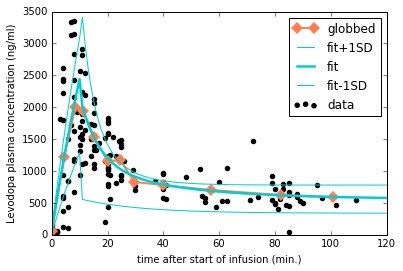

In [340]:
plt.scatter(data_times,data_concs,color='black',label='data')
plt.axis((0,120,0,3500))
plt.xlabel('time after start of infusion (min.)') 
plt.ylabel('Levodopa plasma concentration (ng/ml)')
# plot the globbed points
plottimes=(zero_time,five_time,eight_time,eleven_time,fifteen_time,twenty_time,twen5_time,
           thirty_time,forty_time,sixty_time,eighty_time,late_time)
plotconcs=(zeroes,fives,eights,elevens,fifteens,twenties,twen5s,thirties,forties,sixties,
           eighties,lates)
plt.plot(plottimes,plotconcs,'coral',
         markersize=8,marker=('D'),markeredgewidth=0,linewidth=2.0,label='globbed')
time=np.arange(0,121)
p_hi  = popt + np.sqrt(np.diag(pcov))
p_low = np.maximum(popt - np.sqrt(np.diag(pcov)),np.zeros_like(popt))
plt.plot(time,Cp(time,zeroes+zero_SD,eights+eight_SD,*p_hi),
         color='darkturquoise',linewidth=1,label='fit+1SD')
plt.plot(time,Cp(time,concs[0],concs[2],*popt),color='darkturquoise',linewidth=2.5,label='fit')
plt.plot(time,Cp(time,zeroes-zero_SD,eights-eight_SD,*p_low),
         color='darkturquoise',linewidth=1,label='fit-1SD')
plt.legend(loc='upper right')
plt.show

# Next:
See the text after box 10 for some details.

1. **DONE.** Fit $C_{p\beta}(t) = C_\infty + Be^{-\beta(t-10)}$ to the data points $(29.7,C_p(29.7))$ and $(82,C_p(82))$ in each curve.
2. Choose $A$ and $\alpha$ so $Ae^{-\alpha(t-t_{load})}$ is $C_p(t_{load})-C_{b\beta}(t_{load})$ at $t=t_{load}$ and is $diff$ when $t=29.7$.
3. Generate and plot the 100 resulting curves, and then save them as 4dfp images (a 1-volume image for the 100 values of each parameter, i.e. Cp(0), Cp(9), A, alpha, B, beta, plus a 100-volume image for the 100 time courses resulting (at each voxel) from the corresponding voxels in the parameter images.
4. Use the 100 time courses and the 6 PD parameter triples (ec50, n, ke) for the 6 illness levels (best, H&Y1, ... H&Y4, worst) to generate 600 expected time-effect curves (no noise added). 
5. LOOK AT RESULTS AT THIS STEP FIRST, without noise added to the time-effect curves, and decide whether changing the total LD dose based on roughly estimated PD severity is something we want to do. 
6. THEN, Add several levels of noise with some (small) number of replicates (voxels) for each noise level. Warning, if we try to do 100 voxels for each noise level that's 60,000 time-effect curves for each noise level, say 600,000 time-effect curves if we do 10 levels of noise. I'm not liking that! Maybe 25 voxels for each noise level? Then if we pick, say, 5 levels of noise, we have 100 x 6 x 25 x 5 = 75,000 time-effect curves, which seems more tractable but still a lot. Look, **let's start with 25 rather than 100 PK curves,** producing 25 PK curves x 6 severity groups x 5 noise levels x 25 noise curves at each level = 18,750 time-effect curves. If the next step runs quickly we can add more, but this should be plenty to get the general effect for us even if not enough for us to be completely confident in the error magnitude.
7. Provide the resulting time courses without noise, n=150 (=25x6) and with noise (n=thousands) to Bayes and see how accurately it returns the input pharmacodynamic parameters.

# Wait.

How about we just use the "stacked" $C_p(t)$ curves (gray lines in boxes 25 and 26 above) as the input? Until we have better data, we'll be using this kind of data anyway for each subject. 

Well, actually, we'd be doing more blood draws in the first 20 or so minutes after the end of the loading dose, so I guess not.

In [1]:
glob_interval_end = np.asarray([2.5, 6.5, 10.0, 12.5, 17.5, 22.5, 27.5, 35, 45, 70, 90, 240])
# create an array with points selected from data, with one row for each interval and [size of data] elements in each row
glob = np.zeros([glob_interval_end.size,data_times.size])

start = -1.0
for i in range(glob_interval_end.size):
    end = glob_interval_end[i]
    items = np.logical_and(data_times > start,data_times <=end)
    globsize[i,:] = data_times[items].size
    globtime[i,:] = np.mean(data_times[items])
    globconc[i,:] = np.mean(data_concs[items])
    globSD[i,:]   = np.std( data_concs[items])
    start = end


NameError: name 'np' is not defined